# Robot Data Analysis

### Konwersja danych

1. **Importowanie funkcji konwersji**:
   ```python
   from converter import convert_txt_to_csv
   ```
   Importowanie funkcji `convert_txt_to_csv` z pliku `converter.py`.

2. **Konwersja pliku tekstowego na CSV**:
   ```python
   convert_txt_to_csv("data", "data")
   ```
   Wywołanie funkcji `convert_txt_to_csv` z argumentami:
   - `input_name`: `"data"` - nazwa pliku wejściowego bez rozszerzenia (przyjmuje się, że istnieje plik `"data.txt"`).
   - `output_name`: `"data"` - nazwa pliku wyjściowego bez rozszerzenia (wynikowy plik będzie `"data.csv"`).

### Opis kodu w pliku `converter.py`

1. **Konwersja pliku tekstowego na plik CSV**:
   ```python
   import csv

   def convert_txt_to_csv(input_name, output_name, LIMIT: int = 0):
       with open(input_name + ".txt", "r") as in_file:
           lines = [line.strip().split("\t") for line in in_file if line.strip()]
           if LIMIT > 0:
               lines = lines[:LIMIT]
           with open(output_name + ".csv", "w", newline="") as out_file:
               writer = csv.writer(out_file)
               writer.writerows(lines)
   ```
   Funkcja `convert_txt_to_csv` wykonuje konwersję pliku tekstowego (`input_name + ".txt"`) na plik CSV (`output_name + ".csv"`). Parametr `LIMIT` opcjonalnie ogranicza liczbę wierszy do przetworzenia. Plik wejściowy jest odczytywany linia po linii, dzielony na kolumny przez znak tabulacji (`"\t"`), a następnie zapisywany do pliku CSV przy użyciu modułu `csv`.

2. **Uruchomienie funkcji konwersji**:
   ```python
   if __name__ == "__main__":
       convert_txt_to_csv("data", "data")
   ```
   Fragment kodu sprawdza, czy plik `converter.py` jest uruchamiany bezpośrednio (a nie importowany jako moduł). Jeśli tak, funkcja `convert_txt_to_csv("data", "data")` jest automatycznie wywoływana, konwertując plik `"data.txt"` na `"data.csv"` bez limitu liczby wierszy.

In [2]:
from converter import convert_txt_to_csv

# convert_txt_to_csv("Dane0002-Volt", "data")
convert_txt_to_csv("Dane0002-Volt", "data", 30000)


### Import danych

1. **Importowanie bibliotek**:
   ```python
   import pandas as pd
   ```
   Importowanie biblioteki `pandas` do obsługi struktur danych DataFrame.

2. **Wczytanie danych**:
   ```python
   file_path = 'data.csv'
   df = pd.read_csv(file_path, names=['z_V', 'y_V', 'x_V'])
   ```
   Wczytanie danych z pliku CSV do DataFrame i zdefiniowanie nazw kolumn jako `'z_V'`, `'y_V'` oraz `'x_V'`.

3. **Dodanie kolumny czasu**:
   ```python
   samples_rate = 500 # czas próbkowania w Hz
   df['t_s'] = df.index / samples_rate  # 500 Hz = 0.002s
   ```
   Dodanie kolumny `'t_s'` reprezentującej czas w sekundach. Częstotliwość próbkowania wynosi 500 Hz, co oznacza, że każda próbka jest pobierana co 0.002 sekundy.

4. **Przeliczenie wartości na milimetry**:
   ```python
   df['z_mm'] = df['z_V'] / 0.1  # 1V/cm = 0.1V/mm
   df['y_mm'] = df['y_V'] / 0.143  # 1.43V/cm = 0.143V/mm
   df['x_mm'] = df['x_V'] / 0.143  # 1.43V/cm = 0.143V/mm
   ```
   Przeliczenie wartości z czujników (w woltach) na milimetry:
   - `'z_V'` przeliczane jest na `'z_mm'` według przelicznika 1V/cm (czyli 0.1V/mm).
   - `'y_V'` i `'x_V'` przeliczane są na `'y_mm'` i `'x_mm'` według przelicznika 1.43V/cm (czyli 0.143V/mm).

5. **Wyświetlenie DataFrame**:
   ```python
   display(df)
   ```
   Wyświetlenie DataFrame z przeliczoną wartością w milimetrach.


In [3]:
import pandas as pd

# Ścieżka do pliku z danymi
file_path = 'data.csv'

# Wczytanie danych z pliku CSV do DataFrame, zdefiniowanie nazw kolumn
df = pd.read_csv(file_path, names=['z_V', 'y_V', 'x_V'])

# Dodanie kolumny 't_s' reprezentującej czas w sekundach, przy założeniu częstotliwości próbkowania 500 Hz (0.002s)
samples_rate = 500 # czas próbkowania w Hz
df['t_s'] = df.index / samples_rate  # 500 Hz = 0.002s

# Przeliczenie wartości z czujników na milimetry
df['z_mm'] = df['z_V'] / 0.1  # 1V/cm = 0.1V/mm
df['y_mm'] = df['y_V'] / 0.143  # 1.43V/cm = 0.143V/mm
df['x_mm'] = df['x_V'] / 0.143  # 1.43V/cm = 0.143V/mm

# Wyświetlenie DataFrame z przeliczoną wartością w milimetrach
display(df)


,z_V,y_V,x_V,t_s,z_mm,y_mm,x_mm
0,-1.8844,3.3268,6.8920,0.000,-18.844,23.264336,48.195804
1,-1.8816,3.3272,6.8944,0.002,-18.816,23.267133,48.212587
2,-1.8820,3.3276,6.8944,0.004,-18.820,23.269930,48.212587
3,-1.8820,3.3244,6.8928,0.006,-18.820,23.247552,48.201399
4,-1.8820,3.3260,6.8924,0.008,-18.820,23.258741,48.198601
...,...,...,...,...,...,...,...
29995,0.5956,0.3696,6.8932,59.990,5.956,2.584615,48.204196
29996,0.5976,0.3696,6.8932,59.992,5.976,2.584615,48.204196
29997,0.5996,0.3708,6.8932,59.994,5.996,2.593007,48.204196
29998,0.6000,0.3692,6.8932,59.996,6.000,2.581818,48.204196


### Stworzenie wykresu

1. **Importowanie biblioteki do tworzenia wykresów**:
   ```python
   import matplotlib.pyplot as plt
   ```
   Importowanie modułu `matplotlib.pyplot` jako `plt` do tworzenia wykresów.

2. **Ustawienie rozmiaru figury wykresu**:
   ```python
   scale = 15
   fig = plt.figure(figsize=(297/scale, 210/scale))  # 297mm x 210mm (A4 poziomo)
   ```
   Ustawienie rozmiaru figury wykresu w milimetrach. Skala `15` oznacza, że figura będzie miała rozmiar A4 poziomo, gdzie szerokość wynosi 297 mm, a wysokość 210 mm.

3. **Tworzenie wykresu liniowego dla danych x, y i z w milimetrach**:
   ```python
   plt.plot(df['t_s'], df['x_mm'], label='x_mm')
   plt.plot(df['t_s'], df['y_mm'], label='y_mm')
   plt.plot(df['t_s'], df['z_mm'], label='z_mm')
   ```
   Tworzenie trzech serii danych na wykresie liniowym:
   - `df['t_s']` jako oś x (czas w sekundach).
   - `df['x_mm']`, `df['y_mm']`, `df['z_mm']` jako osie y (przemieszczenia w milimetrach dla osi x, y i z).

4. **Ustawienie etykiet osi i tytułu**:
   ```python
   plt.xlabel('Czas [s]')
   plt.ylabel('Przemieszczenie [mm]')
   plt.title('Wykres liniowy dla osi x, y i z w przebiegu czasowym')
   ```
   Dodanie etykiet do osi x i y oraz tytułu wykresu.

5. **Dodanie legendy**:
   ```python
   plt.legend()
   ```
   Dodanie legendy do wykresu na podstawie nazw serii danych (`'x_mm'`, `'y_mm'`, `'z_mm'`).

6. **Zapisanie wykresu jako plik SVG w wysokiej rozdzielczości (800 DPI)**:
   ```python
   plt.savefig('wykres_mm.svg', format='svg', dpi=800)
   ```
   Zapisanie wykresu do pliku SVG o nazwie `'wykres_mm.svg'` w wysokiej rozdzielczości (800 DPI), co zapewnia dobrą jakość graficzną wykresu.

7. **Wyświetlenie wykresu (opcjonalne)**:
   ```python
   plt.show()
   ```
   Opcjonalne wyświetlenie wygenerowanego wykresu na ekranie (przydatne, jeśli chcemy zobaczyć wykres w notatniku lub interaktywnie).

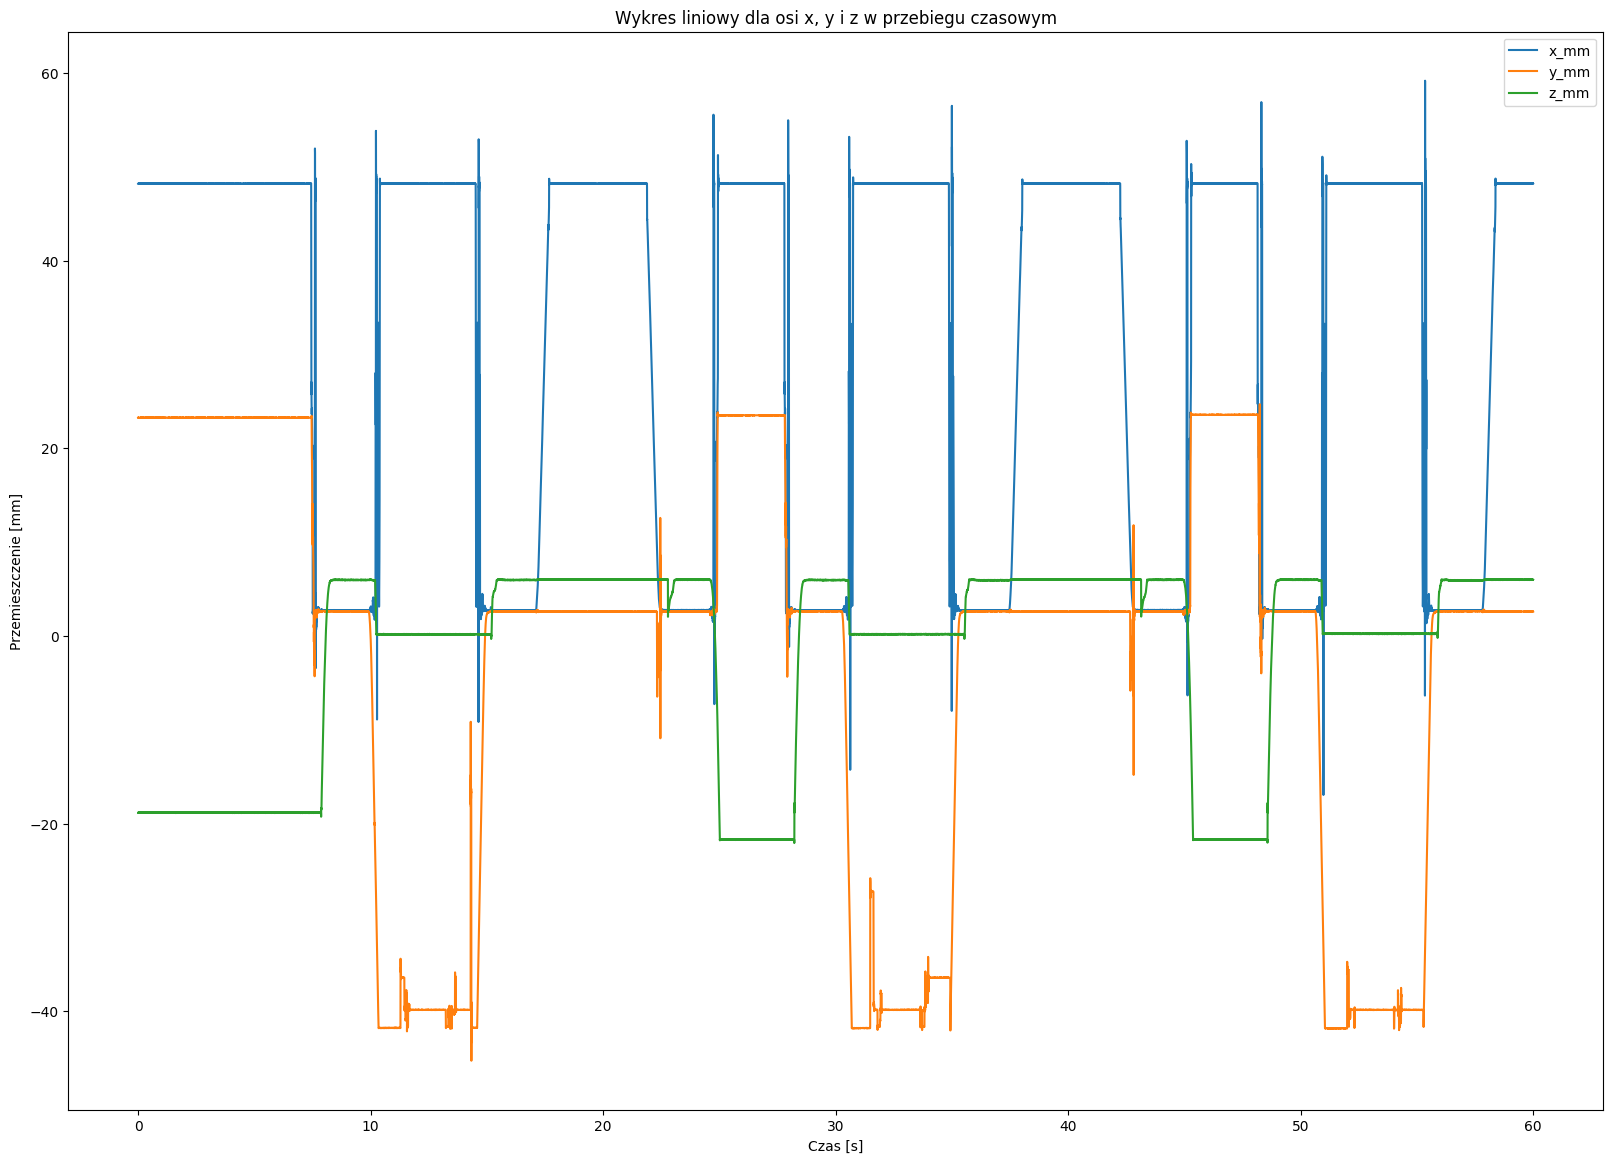

In [4]:
import matplotlib.pyplot as plt

# Ustawienie rozmiaru figury w milimetrach (rozmiar A4 poziomo)
scale = 15
fig = plt.figure(figsize=(297/scale, 210/scale))  # 297mm x 210mm (A4 poziomo)

# Tworzenie wykresu liniowego
plt.plot(df['t_s'], df['x_mm'], label='x_mm')
plt.plot(df['t_s'], df['y_mm'], label='y_mm')
plt.plot(df['t_s'], df['z_mm'], label='z_mm')

# Ustawienie etykiet osi i tytułu
plt.xlabel('Czas [s]')
plt.ylabel('Przemieszczenie [mm]')
plt.title('Wykres liniowy dla osi x, y i z w przebiegu czasowym')

# Dodanie legendy
plt.legend()

# Zapisanie wykresu jako SVG w wysokiej rozdzielczości (800 DPI)
plt.savefig('wykres_mm.svg', format='svg', dpi=800)

# Wyświetlenie wykresu (opcjonalne, jeśli chcemy zobaczyć wykres w notatniku)
plt.show()

### Oczyszczenie danych z błędów pomiarowych

1. **Określenie progu zmian (np. 10 mm)**:
   ```python
   threshold = 0.3
   ```
   Zdefiniowanie progu `threshold` na poziomie 0.3 mm. Ten próg będzie używany do identyfikacji punktów danych, które różnią się od swoich poprzedników o więcej niż 0.3 mm.

2. **Obliczenie różnic pomiędzy kolejnymi punktami danych**:
   ```python
   diff_x = df['x_mm'].diff().abs()
   diff_y = df['y_mm'].diff().abs()
   diff_z = df['z_mm'].diff().abs()
   ```
   Obliczenie wartości bezwzględnych różnic pomiędzy kolejnymi wartościami dla każdej z osi x (`'x_mm'`), y (`'y_mm'`) i z (`'z_mm'`) przekonwertowanych wcześniej na milimetry. Dzięki temu otrzymujemy informację o zmianie wartości między kolejnymi punktami.

3. **Identyfikacja wierszy do usunięcia**:
   ```python
   to_remove = (diff_x > threshold) | (diff_y > threshold) | (diff_z > threshold)
   ```
   Stworzenie maski logicznej `to_remove`, która określa, które wiersze zawierają wartości różnic większe niż ustalony `threshold` dla każdej osi (`'x_mm'`, `'y_mm'`, `'z_mm'`). Wiersze te zostaną oznaczone jako do usunięcia.

4. **Usunięcie wierszy zawierających błędy przetwarzania czujników**:
   ```python
   df_cleaned = df[~to_remove]
   ```
   Stworzenie nowego DataFrame `df_cleaned`, który zawiera tylko te wiersze z pierwotnego DataFrame `df`, które nie są oznaczone jako do usunięcia (czyli `~to_remove`).

5. **Wyświetlenie oczyszczonego DataFrame**:
   ```python
   display(df_cleaned)
   ```
   Wyświetlenie oczyszczonego DataFrame `df_cleaned`, który zawiera dane po usunięciu wierszy, gdzie wystąpiły błędy przetwarzania czujników.

### Uwagi

- Kod wykonuje proces detekcji i usuwania punktów danych, które wykazują znaczące zmiany (przekraczające próg `threshold`). Jest to przydatne do eliminacji przypadkowych błędów pomiarowych lub szumów w danych z czujników.
- Oczyszczone dane są przechowywane w DataFrame `df_cleaned`, który może być dalej wykorzystywany do analizy lub wizualizacji bez uwzględnienia błędnych punktów.

In [5]:
# Określenie progu zmian (np. 10 mm)
threshold = 0.1

# Obliczenie różnic pomiędzy kolejnymi punktami danych
diff_x = df['x_mm'].diff().abs()
diff_y = df['y_mm'].diff().abs()
diff_z = df['z_mm'].diff().abs()

# Identyfikacja wierszy do usunięcia
to_remove = (diff_x > threshold) | (diff_y > threshold) | (diff_z > threshold)

# Usunięcie wierszy zawierających błędy przetwarzania czujników
df_cleaned = df[~to_remove]

# Wyświetlenie oczyszczonego DataFrame
display(df_cleaned)


,z_V,y_V,x_V,t_s,z_mm,y_mm,x_mm
0,-1.8844,3.3268,6.8920,0.000,-18.844,23.264336,48.195804
1,-1.8816,3.3272,6.8944,0.002,-18.816,23.267133,48.212587
2,-1.8820,3.3276,6.8944,0.004,-18.820,23.269930,48.212587
3,-1.8820,3.3244,6.8928,0.006,-18.820,23.247552,48.201399
4,-1.8820,3.3260,6.8924,0.008,-18.820,23.258741,48.198601
...,...,...,...,...,...,...,...
29995,0.5956,0.3696,6.8932,59.990,5.956,2.584615,48.204196
29996,0.5976,0.3696,6.8932,59.992,5.976,2.584615,48.204196
29997,0.5996,0.3708,6.8932,59.994,5.996,2.593007,48.204196
29998,0.6000,0.3692,6.8932,59.996,6.000,2.581818,48.204196


### Oczyszczony wykres

1. **Ustawienie rozmiaru figury wykresu**:
   ```python
   fig = plt.figure(figsize=(297/scale, 210/scale))  # 297mm x 210mm (A4 poziomo)
   ```
   Ustawienie rozmiaru figury wykresu w milimetrach. `scale` jest używane do przeskalowania, aby uzyskać odpowiednią wielkość wykresu w formacie A4 poziomo (297 mm szerokość, 210 mm wysokość).

2. **Tworzenie wykresu liniowego dla oczyszczonych danych x, y i z w milimetrach**:
   ```python
   plt.plot(df_cleaned['t_s'], df_cleaned['x_mm'], label='x_mm')
   plt.plot(df_cleaned['t_s'], df_cleaned['y_mm'], label='y_mm')
   plt.plot(df_cleaned['t_s'], df_cleaned['z_mm'], label='z_mm')
   ```
   Tworzenie trzech serii danych na wykresie liniowym:
   - `df_cleaned['t_s']` jako oś x (czas w sekundach) dla oczyszczonych danych.
   - `df_cleaned['x_mm']`, `df_cleaned['y_mm']`, `df_cleaned['z_mm']` jako osie y (przemieszczenia w milimetrach dla osi x, y i z) dla oczyszczonych danych.

3. **Ustawienie etykiet osi i tytułu**:
   ```python
   plt.xlabel('Czas [s]')
   plt.ylabel('Przemieszczenie [mm]')
   plt.title('Wykres liniowy dla osi x, y i z w przebiegu czasowym - oczyszczone dane')
   ```
   Dodanie etykiet do osi x i y oraz tytułu wykresu dla oczyszczonych danych.

4. **Dodanie legendy**:
   ```python
   plt.legend()
   ```
   Dodanie legendy do wykresu na podstawie nazw serii danych (`'x_mm'`, `'y_mm'`, `'z_mm'`) dla oczyszczonych danych.

5. **Zapisanie wykresu jako plik SVG w wysokiej rozdzielczości (800 DPI)**:
   ```python
   plt.savefig('wykres_mm_cleaned.svg', format='svg', dpi=800)
   ```
   Zapisanie wykresu do pliku SVG o nazwie `'wykres_mm_cleaned.svg'` w wysokiej rozdzielczości (800 DPI), co zapewnia dobrą jakość graficzną wykresu dla oczyszczonych danych.

6. **Wyświetlenie wykresu**:
   ```python
   plt.show()
   ```
   Wyświetlenie wygenerowanego wykresu liniowego dla oczyszczonych danych na ekranie.

### Uwagi

- Kod rozbudowuje poprzedni przykład poprzez wykorzystanie oczyszczonych danych (`df_cleaned`), które zostały wcześniej przefiltrowane w celu usunięcia błędnych punktów.
- Wykres jest dostosowany do rozmiaru A4 poziomo i zapisywany jako plik SVG w wysokiej rozdzielczości, co jest korzystne w kontekście prezentacji lub druku.
- Dodatkowo, wykres jest wyświetlany na ekranie za pomocą `plt.show()`, co pozwala na wgląd w jego wygląd i formatowanie przed zapisem.

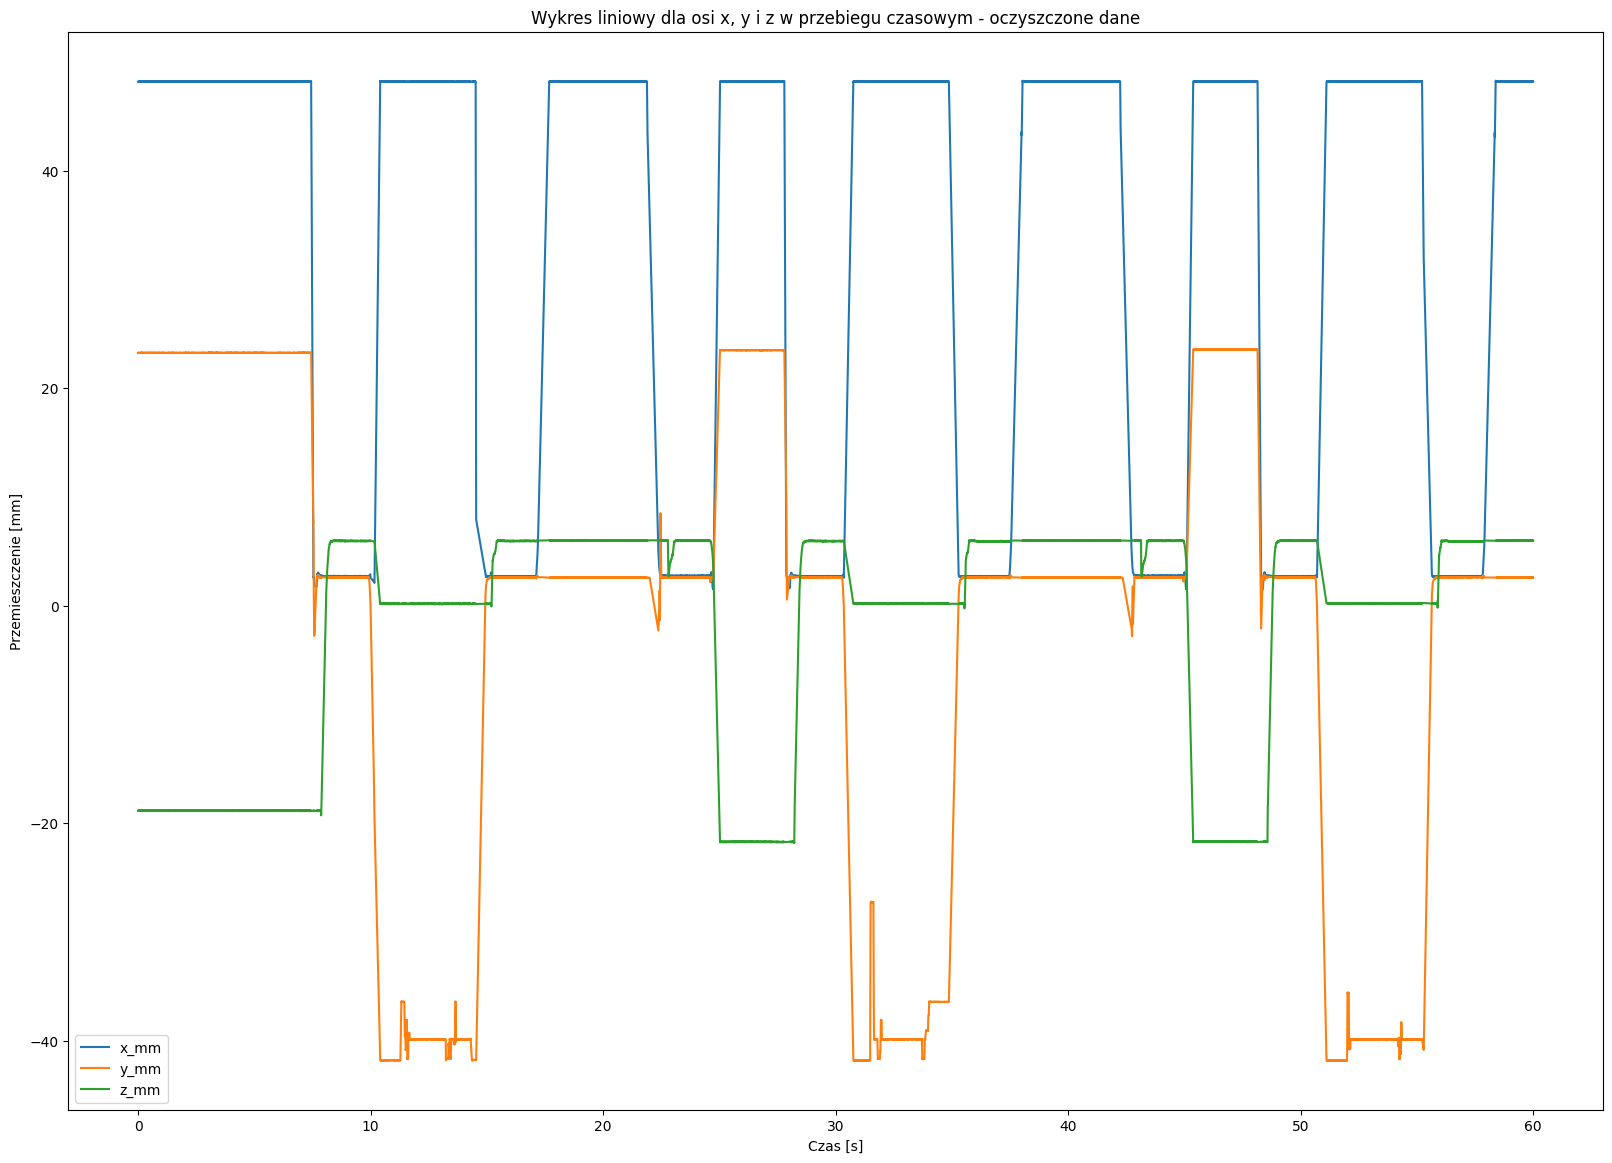

In [6]:
fig = plt.figure(figsize=(297/scale, 210/scale))  # 297mm x 210mm (A4 poziomo)

plt.plot(df_cleaned['t_s'], df_cleaned['x_mm'], label='x_mm')
plt.plot(df_cleaned['t_s'], df_cleaned['y_mm'], label='y_mm')
plt.plot(df_cleaned['t_s'], df_cleaned['z_mm'], label='z_mm')

# Ustawienie etykiet osi i tytułu
plt.xlabel('Czas [s]')
plt.ylabel('Przemieszczenie [mm]')
plt.title('Wykres liniowy dla osi x, y i z w przebiegu czasowym - oczyszczone dane')

# Dodanie legendy
plt.legend()

# Zapisanie wykresu jako SVG
plt.savefig('wykres_mm_cleaned.svg', format='svg', dpi=800)

# Wyświetlenie wykresu
plt.show()


### Odnalezienie punktów pomiarowych PP

1. **Zdefiniowanie oczekiwanych wartości dla punktów pomiarowych (PP) dla każdej osi**:
   ```python
   PP_x_expected = 2.6097  # oczekiwana wartość dla osi x w mm
   PP_y_expected = 2.4559  # oczekiwana wartość dla osi y w mm
   PP_z_expected = 5.8720  # oczekiwana wartość dla osi z w mm
   ```
   Definiowanie oczekiwanych wartości punktów pomiarowych dla osi x, y i z w milimetrach.

2. **Zdefiniowanie tolerancji dla każdej osi**:
   ```python
   tolerance_axis_mm = 2.0  # tolerancja w mm
   ```
   Określenie tolerancji wartości punktów pomiarowych dla każdej osi w milimetrach.

3. **Określenie czasu postoju w sekundach**:
   ```python
   break_s = 2.0  # czas postoju 2 sekundy
   ```
   Definiowanie czasu postoju w sekundach, który wynosi 2 sekundy.

4. **Tolerancja czasu postoju**:
   ```python
   tolerance_break = 0.8
   ```
   Określenie tolerancji czasu postoju.

5. **Obliczenie liczby próbek potrzebnych do uzyskania czasu postoju**:
   ```python
   samples_per_break = int(break_s * samples_rate * tolerance_break)  # częstotliwość próbkowania 500 Hz
   ```
   Obliczenie liczby próbek potrzebnych do uzyskania czasu postoju na podstawie częstotliwości próbkowania (500 Hz) i tolerancji czasu postoju. 

6. **Funkcja do wykrywania punktów pomiarowych (PP)**:
   ```python
   def detect_PP(df, expected_value, tolerance, samples_per_break):
       # Inicjalizacja listy przechowującej momenty czasowe PP
       PP_times = []
       
       # Początkowy indeks czasu
       i = 0
       
       # Przeszukiwanie danych w poszukiwaniu punktów pomiarowych (PP)
       while i < len(df):
           # Sprawdzenie, czy wystarczająco dużo danych do analizy połowy czasu postoju
           if i + samples_per_break < len(df):
               # Wybór fragmentu danych na podstawie połowy czasu postoju
               window = df.iloc[i:i + samples_per_break]
               
               # Sprawdzenie, czy średnie wartości w tolerancji w oknie czasowym
               if ((window['x_mm'].mean() - expected_value['x']) <= tolerance and
                   (window['y_mm'].mean() - expected_value['y']) <= tolerance and
                   (window['z_mm'].mean() - expected_value['z']) <= tolerance):
                   # Jeżeli warunek spełniony, zapamiętaj czas środkowy okna jako PP
                   PP_times.append(window['t_s'].iloc[int(samples_per_break / 2)])
                   
                   # Przesuń się o co najmniej połowę czasu postoju przed szukaniem następnego PP
                   i += samples_per_break
               
               # W przeciwnym razie, przesuń się o jeden krok
               else:
                   i += 1
           else:
               break
       
       return PP_times
   ```
   Funkcja `detect_PP` przeszukuje dane w DataFrame `df` w celu wykrycia punktów pomiarowych (PP). Inicjalizuje listę `PP_times` do przechowywania czasów PP i przeszukuje dane, sprawdzając średnie wartości w oknach czasowych. Jeśli wartości mieszczą się w ustalonej tolerancji, zapisuje czas środkowy okna jako PP. Funkcja zwraca listę czasów PP.

7. **Wykrycie punktów pomiarowych (PP) dla każdej osi**:
   ```python
   PP_times = detect_PP(df_cleaned, {'x': PP_x_expected, 'y': PP_y_expected, 'z': PP_z_expected}, tolerance_axis_mm, samples_per_break)
   ```
   Wykrywanie punktów pomiarowych (PP) dla każdej osi (x, y, z) w oczyszczonym DataFrame `df_cleaned` przy użyciu funkcji `detect_PP`.

8. **Wyświetlenie znalezionych punktów pomiarowych (PP)**:
   ```python
   print(f"Znalezione punkty pomiarowe (PP):\n{PP_times}")
   ```
   Wyświetlenie listy znalezionych punktów pomiarowych (PP) na ekranie.

### Uwagi

- Kod wykorzystuje funkcję `detect_PP` do identyfikacji punktów pomiarowych (PP) w danych na podstawie określonych oczekiwanych wartości i tolerancji.
- Obliczenie liczby próbek potrzebnych do uzyskania czasu postoju uwzględnia częstotliwość próbkowania i tolerancję czasu postoju.
- Kod przeszukuje dane w oczyszczonym DataFrame `df_cleaned` i identyfikuje momenty czasowe, w których wartości pomiarów mieszczą się w zadanej tolerancji wokół oczekiwanych wartości.
- Wynikiem działania kodu jest lista momentów czasowych, w których występują punkty pomiarowe, co może być użyteczne do dalszej analizy lub walidacji danych.

In [7]:
# Zdefiniowanie oczekiwanych wartości dla PP dla każdej osi
PP_x_expected = 2.6097 # oczekiwana wartość dla osi x w mm
PP_y_expected = 2.4559 # oczekiwana wartość dla osi y w mm
PP_z_expected = 5.8720 # oczekiwana wartość dla osi z w mm

# Zdefiniowanie tolerancji dla każdej osi
tolerance_axis_mm = 2.0  # tolerancja w mm

# Określenie czasu postoju w sekundach
break_s = 2.0  # czas postoju 2 sekundy

# Tolerancja czasu postouju 
tolerance_break = 0.8 

# Obliczenie liczby próbek potrzebnych do uzyskania czasu postoju
samples_per_break = int(break_s * samples_rate * tolerance_break)  # częstotliwość próbkowania 500 Hz

# Funkcja do wykrywania punktów pomiarowych (PP)
def detect_PP(df, expected_value, tolerance, samples_per_break):
    # Inicjalizacja listy przechowującej momenty czasowe PP
    PP_times = []
    
    # Początkowy indeks czasu
    i = 0
    
    # Przeszukiwanie danych w poszukiwaniu punktów pomiarowych (PP)
    while i < len(df):
        # Sprawdzenie, czy wystarczająco dużo danych do analizy połowy czasu postoju
        if i + samples_per_break < len(df):
            # Wybór fragmentu danych na podstawie połowy czasu postoju
            window = df.iloc[i:i + samples_per_break]
            
            # Sprawdzenie, czy średnie wartości w tolerancji w oknie czasowym
            if ((window['x_mm'].mean() - expected_value['x']) <= tolerance and
                (window['y_mm'].mean() - expected_value['y']) <= tolerance and
                (window['z_mm'].mean() - expected_value['z']) <= tolerance):
                # Jeżeli warunek spełniony, zapamiętaj czas środkowy okna jako PP
                PP_times.append(window['t_s'].iloc[int(samples_per_break / 2)])
                
                # Przesuń się o co najmniej połowę czasu postoju przed szukaniem następnego PP
                i += samples_per_break
            
            # W przeciwnym razie, przesuń się o jeden krok
            else:
                i += 1
        else:
            break
    
    return PP_times

# Wykrycie punktów pomiarowych (PP) dla każdej osi
PP_times = detect_PP(df_cleaned, {'x': PP_x_expected, 'y': PP_y_expected, 'z': PP_z_expected}, tolerance_axis_mm, samples_per_break)

# Wyświetlenie znalezionych PP
print(f"Znalezione punkty pomiarowe (PP):\n{PP_times}")

Znalezione punkty pomiarowe (PP):
[8.654, 15.724, 23.252, 29.016, 36.07, 43.602, 49.372, 56.426]


### Wykreślenie PP na wykresie

1. **Ustawienie rozmiaru figury wykresu**:
   ```python
   scale = 15
   fig = plt.figure(figsize=(297/scale, 210/scale))  # 297mm x 210mm (A4 poziomo)
   ```
   Ustawienie rozmiaru figury wykresu w milimetrach, przeskalowane do formatu A4 poziomo (297 mm szerokość, 210 mm wysokość).

2. **Tworzenie wykresu liniowego dla oczyszczonych danych x, y i z w milimetrach**:
   ```python
   plt.plot(df_cleaned['t_s'], df_cleaned['x_mm'], label='x_mm')
   plt.plot(df_cleaned['t_s'], df_cleaned['y_mm'], label='y_mm')
   plt.plot(df_cleaned['t_s'], df_cleaned['z_mm'], label='z_mm')
   ```
   Tworzenie trzech serii danych na wykresie liniowym:
   - `df_cleaned['t_s']` jako oś x (czas w sekundach) dla oczyszczonych danych.
   - `df_cleaned['x_mm']`, `df_cleaned['y_mm']`, `df_cleaned['z_mm']` jako osie y (przemieszczenia w milimetrach dla osi x, y i z) dla oczyszczonych danych.

3. **Dodanie pionowych linii dla punktów pomiarowych (PP)**:
   ```python
   for pp_time in PP_times:
       plt.axvline(x=pp_time, color='r', linestyle='--', linewidth=1)
   ```
   Dodanie pionowych przerywanych linii (w kolorze czerwonym) na wykresie w miejscach, gdzie zidentyfikowano punkty pomiarowe (PP). Linie te zaznaczają czasy PP (`pp_time`) na osi x.

4. **Ustawienie etykiet osi i tytułu**:
   ```python
   plt.xlabel('Czas [s]')
   plt.ylabel('Przemieszczenie [mm]')
   plt.title('Wykres liniowy dla osi x, y i z w przebiegu czasowym - oczyszczone dane z naniesionymi PP')
   ```
   Dodanie etykiet do osi x i y oraz tytułu wykresu, który wskazuje, że dane zostały oczyszczone i zawierają zaznaczone punkty pomiarowe (PP).

5. **Dodanie legendy**:
   ```python
   plt.legend()
   ```
   Dodanie legendy do wykresu na podstawie nazw serii danych (`'x_mm'`, `'y_mm'`, `'z_mm'`).

6. **Zapisanie wykresu jako plik SVG w wysokiej rozdzielczości (800 DPI)**:
   ```python
   plt.savefig('wykres_mm_cleaned_with_PP.svg', format='svg', dpi=800)
   ```
   Zapisanie wykresu do pliku SVG o nazwie `'wykres_mm_cleaned_with_PP.svg'` w wysokiej rozdzielczości (800 DPI), co zapewnia dobrą jakość graficzną wykresu.

7. **Wyświetlenie wykresu**:
   ```python
   plt.show()
   ```
   Wyświetlenie wygenerowanego wykresu liniowego na ekranie.

### Uwagi

- Kod rozszerza poprzedni przykład, dodając pionowe linie dla punktów pomiarowych (PP) na wykresie, co ułatwia wizualną identyfikację momentów czasowych, w których występują PP.
- Rozmiar wykresu jest dostosowany do formatu A4 poziomo, co jest korzystne w kontekście prezentacji lub druku.
- Linie PP są zaznaczone na czerwono, co sprawia, że są łatwo zauważalne na tle wykresu.
- Wykres jest zapisywany w formacie SVG, co zapewnia wysoką jakość grafiki, oraz wyświetlany na ekranie za pomocą `plt.show()`.

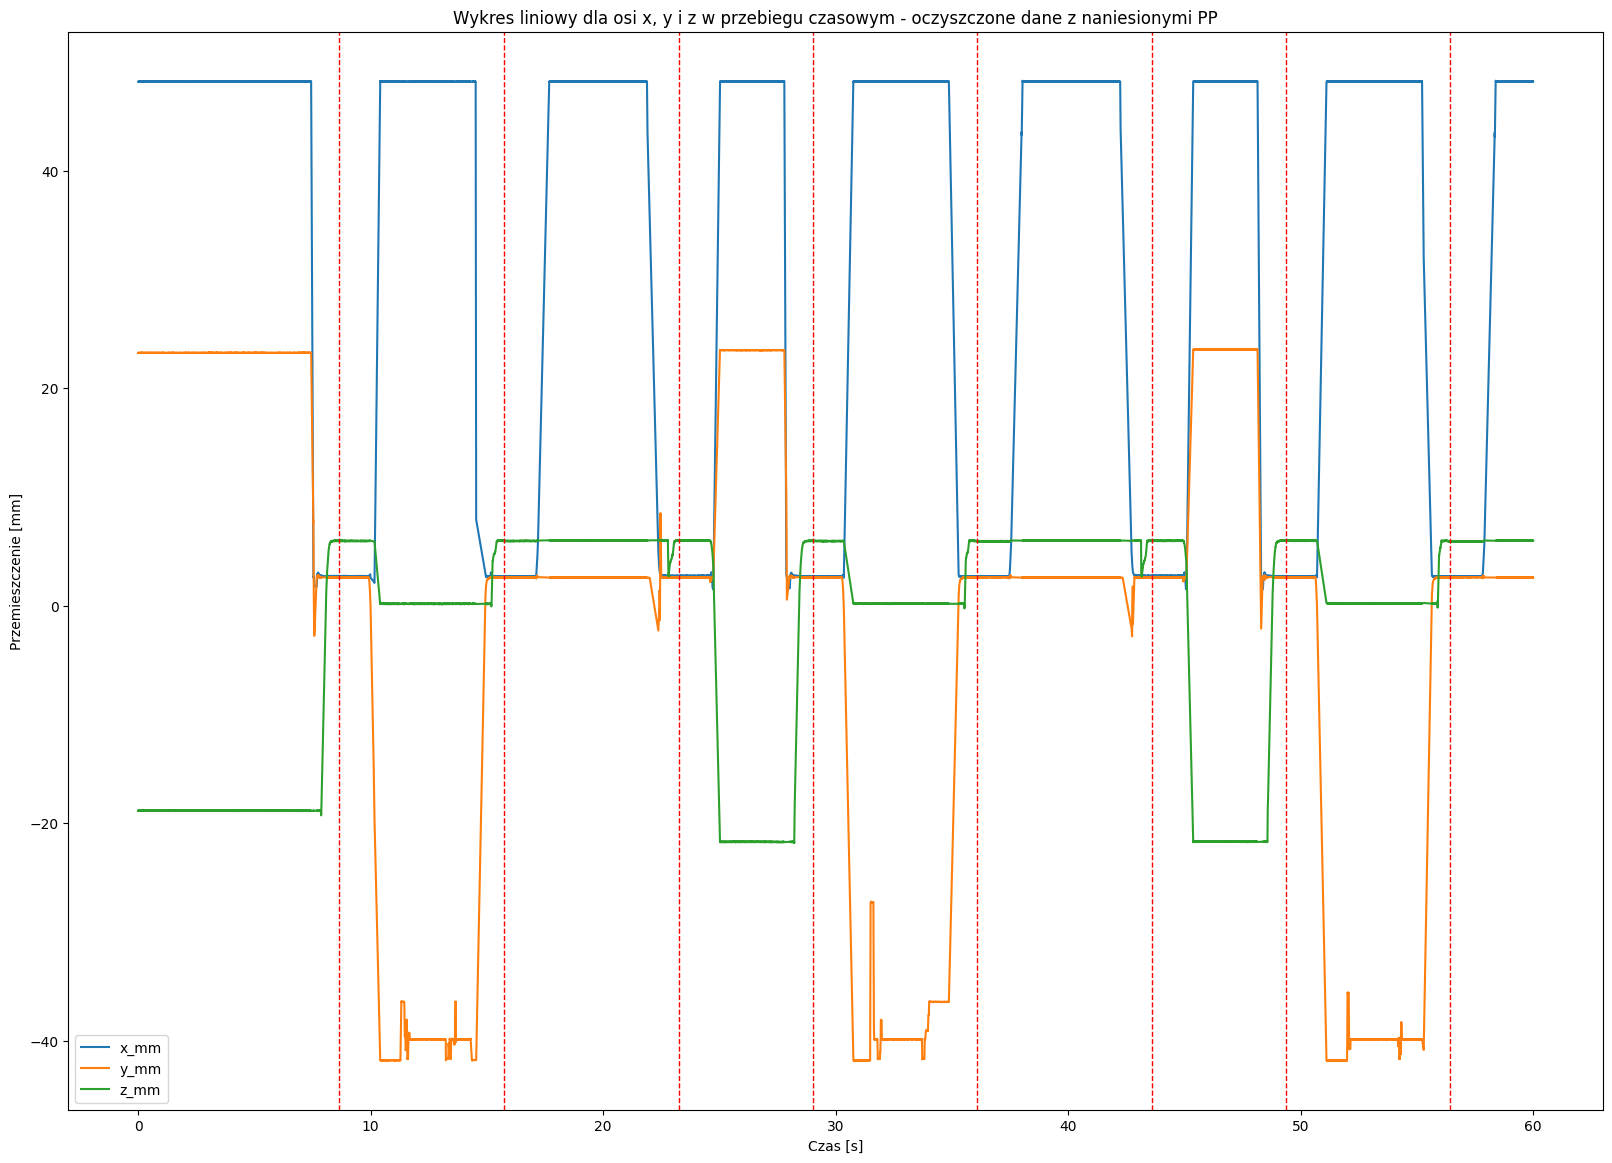

In [8]:
# Ustawienie rozmiaru figury w milimetrach (rozmiar A4 poziomo)
scale = 15
fig = plt.figure(figsize=(297/scale, 210/scale))  # 297mm x 210mm (A4 poziomo)

# Wykresy dla osi x, y i z
plt.plot(df_cleaned['t_s'], df_cleaned['x_mm'], label='x_mm')
plt.plot(df_cleaned['t_s'], df_cleaned['y_mm'], label='y_mm')
plt.plot(df_cleaned['t_s'], df_cleaned['z_mm'], label='z_mm')

# Dodanie pionowych linii dla punktów pomiarowych (PP)
for pp_time in PP_times:
    plt.axvline(x=pp_time, color='r', linestyle='--', linewidth=1)

# Ustawienie etykiet osi i tytułu
plt.xlabel('Czas [s]')
plt.ylabel('Przemieszczenie [mm]')
plt.title('Wykres liniowy dla osi x, y i z w przebiegu czasowym - oczyszczone dane z naniesionymi PP')

# Dodanie legendy
plt.legend()

# Zapisanie wykresu jako SVG
plt.savefig('wykres_mm_cleaned_with_PP.svg', format='svg', dpi=800)

# Wyświetlenie wykresu
plt.show()

In [9]:
print(len(PP_times))

8


In [15]:
import numpy as np

def get_values_at_time_points(df, time_points):
    selected_rows = []  # Lista do przechowywania wybranych wierszy
    
    for t in time_points:
        row = df[df['t_s'] == t]
        if not row.empty:
            selected_rows.append(row)
    
    if selected_rows:
        selected_df = pd.concat(selected_rows, ignore_index=True)
    else:
        selected_df = pd.DataFrame(columns=df.columns)  # Jeśli brak wybranych wierszy, zwróć pusty DataFrame

    # display(selected_df)
    
    return selected_df



# Funkcja do obliczenia powtarzalności pozycjonowania (RP)
def calculate_rp(values):
    rp = {}
    for axis in values:
        rp[axis] = np.std(values[axis])
    return rp

# Pobranie wartości dla wybranych punktów czasowych
values_at_time_points_all = get_values_at_time_points(df_cleaned, PP_times)
display(values_at_time_points_all)
# display(values_at_time_points_all[-3:])

# # Obliczenie RP
rp_values_all = calculate_rp(values_at_time_points_all)
rp_values_first_50 = calculate_rp(values_at_time_points_all[:50])
rp_values_last_50 = calculate_rp(values_at_time_points_all[-50:])
rp_values_from_26_to_75 = calculate_rp(values_at_time_points_all[25:75])

# # Wyświetlenie wyników
print("RP dla wszystkich 100 powtórzeń:", rp_values_all)
print("RP dla pierwszych 50 powtórzeń:", rp_values_first_50)
print("RP dla ostatnich 50 powtórzeń:", rp_values_last_50)
print("RP dla powtórzeń od 26 do 75:", rp_values_from_26_to_75)

,z_V,y_V,x_V,t_s,z_mm,y_mm,x_mm
0,0.5944,0.3752,0.3876,8.654,5.944,2.623776,2.710490
1,0.5956,0.3744,0.3856,15.724,5.956,2.618182,2.696503
2,0.5972,0.3704,0.3912,23.252,5.972,2.590210,2.735664
3,0.5952,0.3732,0.3888,29.016,5.952,2.609790,2.718881
4,0.5932,0.3764,0.3872,36.070,5.932,2.632168,2.707692
5,0.5980,0.3720,0.3944,43.602,5.980,2.601399,2.758042
6,0.6004,0.3760,0.3864,49.372,6.004,2.629371,2.702098
7,0.5948,0.3760,0.3908,56.426,5.948,2.629371,2.732867


RP dla wszystkich 100 powtórzeń: {'z_V': 0.0021610182784974436, 'y_V': 0.0020199009876724163, 'x_V': 0.0027568097504180344, 't_s': 15.573563874399463, 'z_mm': 0.02161018278497453, 'y_mm': 0.01412518173197495, 'x_mm': 0.019278389863063197}
RP dla pierwszych 50 powtórzeń: {'z_V': 0.0021610182784974436, 'y_V': 0.0020199009876724163, 'x_V': 0.0027568097504180344, 't_s': 15.573563874399463, 'z_mm': 0.02161018278497453, 'y_mm': 0.01412518173197495, 'x_mm': 0.019278389863063197}
RP dla ostatnich 50 powtórzeń: {'z_V': 0.0021610182784974436, 'y_V': 0.0020199009876724163, 'x_V': 0.0027568097504180344, 't_s': 15.573563874399463, 'z_mm': 0.02161018278497453, 'y_mm': 0.01412518173197495, 'x_mm': 0.019278389863063197}
RP dla powtórzeń od 26 do 75: {'z_V': nan, 'y_V': nan, 'x_V': nan, 't_s': nan, 'z_mm': nan, 'y_mm': nan, 'x_mm': nan}


5.953999999999999 2.6209790209790214 0.020609465667496652


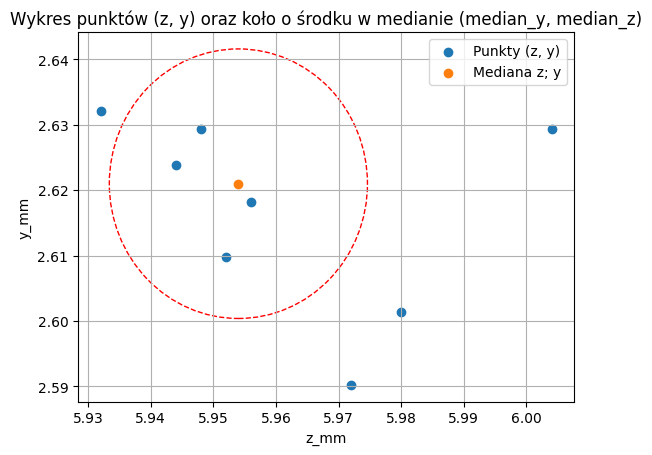

In [22]:
def calculate_median_and_std(df, axis_name):
    median = df[axis_name].median()
    std = df[axis_name].std()
    return median, std




# Obliczenie mediany i odchylenia standardowego dla każdej osi
median_x, std_x = calculate_median_and_std(values_at_time_points_all, 'x_mm')
median_y, std_y = calculate_median_and_std(values_at_time_points_all, 'y_mm')
median_z, std_z = calculate_median_and_std(values_at_time_points_all, 'z_mm')


# Wykres

# Punkty (z, y)
plt.scatter(values_at_time_points_all['z_mm'], values_at_time_points_all['y_mm'], label='Punkty (z, y)')
plt.scatter(median_z, median_y, label='Mediana z; y')

# circle1 = plt.Circle((0, 0), 0.2, color='r')
# circle2 = plt.Circle((0.5, 0.5), 0.2, color='blue')

print(median_z, median_y, std_x)

# Koło o środku w (median_y, median_z) i promieniu std_x
circle = plt.Circle((median_z, median_y), std_x, color='red', fill=False, linestyle='--', linewidth=1)
# plt.gca().add_artist(circle)
plt.gca().add_patch(circle)

# fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
# ax.add_patch(circle1)
# ax.add_patch(circle2)
# ax.add_patch(circle)


plt.xlabel('z_mm')
plt.ylabel('y_mm')
plt.title('Wykres punktów (z, y) oraz koło o środku w medianie (median_y, median_z)')
plt.legend()
plt.grid(True)
plt.show()


# # Wykres dla osi x_mm
# plt.figure(figsize=(8, 6))
# plt.plot(df_cleaned['t_s'], df_cleaned['x_mm'], label='x_mm - Punkty pomiarowe')
# plt.scatter(df_cleaned['t_s'], df_cleaned['x_mm'], color='blue', alpha=0.5)
# plt.scatter(df_cleaned['t_s'].median(), median_x, color='red', label='Mediana x', marker='o', s=100)
# plt.errorbar(df_cleaned['t_s'].median(), median_x, xerr=std_x, fmt='o', color='red', capsize=5)
# plt.xlabel('Czas [s]')
# plt.ylabel('Przemieszczenie [mm]')
# plt.title('Wykres dla osi x_mm')
# plt.legend()
# plt.show()

# # Wykres dla osi y_mm
# plt.figure(figsize=(8, 6))
# plt.plot(df_cleaned['t_s'], df_cleaned['y_mm'], label='y_mm - Punkty pomiarowe')
# plt.scatter(df_cleaned['t_s'], df_cleaned['y_mm'], color='green', alpha=0.5)
# plt.scatter(df_cleaned['t_s'].median(), median_y, color='blue', label='Mediana y', marker='o', s=100)
# plt.errorbar(df_cleaned['t_s'].median(), median_y, xerr=std_y, fmt='o', color='blue', capsize=5)
# plt.xlabel('Czas [s]')
# plt.ylabel('Przemieszczenie [mm]')
# plt.title('Wykres dla osi y_mm')
# plt.legend()
# plt.show()

# # Wykres dla osi z_mm
# plt.figure(figsize=(8, 6))
# plt.plot(df_cleaned['t_s'], df_cleaned['z_mm'], label='z_mm - Punkty pomiarowe')
# plt.scatter(df_cleaned['t_s'], df_cleaned['z_mm'], color='orange', alpha=0.5)
# plt.scatter(df_cleaned['t_s'].median(), median_z, color='green', label='Mediana z', marker='o', s=100)
# plt.errorbar(df_cleaned['t_s'].median(), median_z, xerr=std_z, fmt='o', color='green', capsize=5)
# plt.xlabel('Czas [s]')
# plt.ylabel('Przemieszczenie [mm]')
# plt.title('Wykres dla osi z_mm')
# plt.legend()
# plt.show()


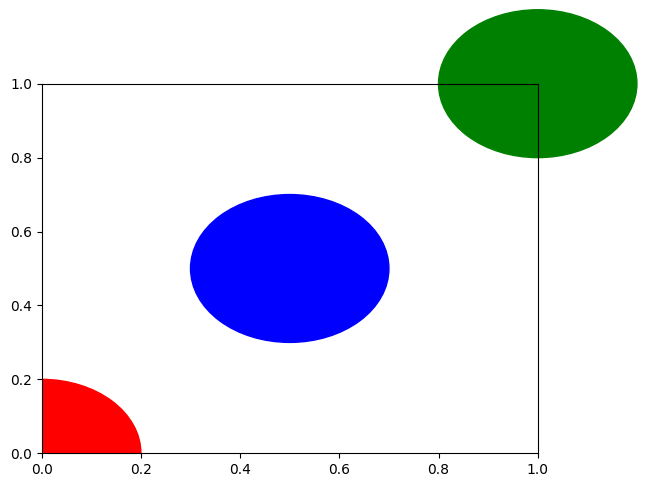

In [12]:
circle1 = plt.Circle((0, 0), 0.2, color='r')
circle2 = plt.Circle((0.5, 0.5), 0.2, color='blue')
circle3 = plt.Circle((1, 1), 0.2, color='g', clip_on=False)

fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)